In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df = pd.read_csv("atmosphere_data1.csv")  # Importing the csv as a dataframe
print("The Data set has {} rows and {} columns\n".format(df.shape[0],df.shape[1]))
#df = df[df['pressure']>1010]

Y = df["temperature"]  # Predicture temperature given presuure
X = df[["pressure","humidity"]]
X = np.array(X)
Y = np.array(Y)



The Data set has 819 rows and 7 columns



In [3]:
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y,test_size=0.3, random_state=42,shuffle=True)

print("X_train shape before reshaping: ",X_train.shape)
X_train = X_train.reshape(-1,2)  #X_train.reshape(661,1)
print("X_train shape after reshaping: ",X_train.shape)

X_test = X_test.reshape(-1,2)

X_train shape before reshaping:  (573, 2)
X_train shape after reshaping:  (573, 2)


In [4]:
rmse_train={} #To store rmse values for different p
rmse_test={}
ypred_train={}
ypred_test={}
for p in [2,3,4,5]:
    polynomial_features = PolynomialFeatures(degree=p)    
    #print("For degree=",p,", the dimension of polynomial features:",poly_feat.shape)
    polynomial_features.fit(X_train)
    x_poly = polynomial_features.transform(X_train)
    print("For degree=",p,", the dimension of polynomial features:",x_poly.shape)
    # If input is 2D, then degree=2 will produce 6D features, [1,x,y,xy,x^2,y^2]
    regressor = LinearRegression()
    regressor.fit(x_poly, Y_train)
    
    y_pred_train = regressor.predict(polynomial_features.fit_transform(X_train))
    y_pred_test = regressor.predict(polynomial_features.fit_transform(X_test))
    ypred_train[p]=y_pred_train
    ypred_test[p]=y_pred_test
    
    mse_train=mean_squared_error(y_pred_train,Y_train)
    mse_test=mean_squared_error(y_pred_test,Y_test)
    rmse_train[p]=np.sqrt(mse_train)
    rmse_test[p]=np.sqrt(mse_test)

For degree= 2 , the dimension of polynomial features: (573, 6)
For degree= 3 , the dimension of polynomial features: (573, 10)
For degree= 4 , the dimension of polynomial features: (573, 15)
For degree= 5 , the dimension of polynomial features: (573, 21)


In [5]:
print("RMSE TEST :",rmse_test)
Keymintest = min(rmse_test, key=rmse_test.get)

print("RMSE TRAIN :",rmse_train)
Keymintrain = min(rmse_train, key=rmse_train.get)
print("\n\n")
print("Minimum RMSE Value for Test Data corresponds to polynomial degree",Keymintest,"with value",rmse_test[Keymintest])
print("Minimum RMSE Value for Train Data corresponds to polynomial degree",Keymintrain,"with value",rmse_train[Keymintrain])

RMSE TEST : {2: 2.794912398300742, 3: 2.6946852611198735, 4: 2.6930018128618776, 5: 2.625024875483696}
RMSE TRAIN : {2: 3.109736627221822, 3: 3.0092813094941424, 4: 2.8805054042594485, 5: 2.847027093013293}



Minimum RMSE Value for Test Data corresponds to polynomial degree 5 with value 2.625024875483696
Minimum RMSE Value for Train Data corresponds to polynomial degree 5 with value 2.847027093013293


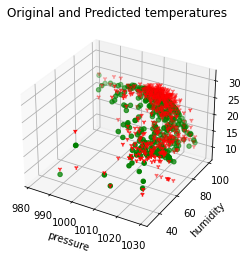

In [6]:
ax = plt.axes(projection ="3d")
ax.scatter(X_train[:,0],X_train[:,1],Y_train,marker = "1", c = "red")
ax.scatter(X_train[:,0],X_train[:,1],y_pred_train,c= "green" )  # Predicted temperature
plt.xlabel("pressure")
plt.ylabel("humidity")

plt.title("Original and Predicted temperatures")
plt.show()

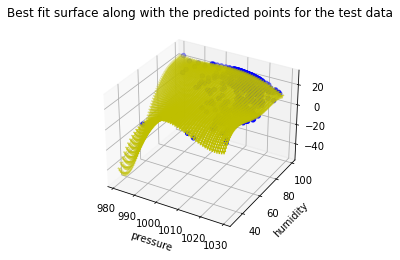

In [7]:
# To visualize the plain learned by the model
Z1 = np.empty((0,2))
for pr in range(int(X_train[:, 0].min()), int(X_train[:, 0].max()),1):
    for hu in range(int(X_train[:, 1].min()), int(X_train[:, 1].max()),1):
        z1 = np.array([pr,hu]).reshape(1,2)
        Z1 = np.append(Z1,z1,axis=0) # Generating 2D points 
        
z_poly = polynomial_features.transform(Z1)        
Z = regressor.predict(z_poly) # Get the model prediction for those 2D points


ax = plt.axes(projection ="3d")
ax.scatter(X_train[:,0],X_train[:,1],y_pred_train,c= "blue" )  # Predicted temperature for actual input
ax.scatter(Z1[:,0],Z1[:,1],Z,marker = "1", c = "y") # The plain learned by the model
plt.xlabel("pressure")
plt.ylabel("humidity")

plt.title("Best fit surface along with the predicted points for the test data")
plt.show()